> # 1. Với tập dữ liệu Adventureworks.csv

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataf = pd.read_csv("AdventureWorks.csv",encoding_errors="ignore",na_values=['?'])
dataf.head()

,CustomerKey,GeographyKey,CustomerAlternateKey,Title,FirstName,MiddleName,LastName,NameStyle,BirthDate,MaritalStatus,...,HouseOwnerFlag,NumberCarsOwned,AddressLine1,AddressLine2,Phone,DateFirstPurchase,CommuteDistance,Region,Age,BikeBuyer
0,11000,26,AW00011000,NaN,Jon,V,Yang,0,1971-10-06,M,...,1,0,3761 N. 14th St,NaN,1 (11) 500 555-0162,2011-01-19,1-2 Miles,Pacific,51,1
1,11001,37,AW00011001,NaN,Eugene,L,Huang,0,1976-05-10,S,...,0,1,2243 W St.,NaN,1 (11) 500 555-0110,2011-01-15,0-1 Miles,Pacific,47,1
2,11002,31,AW00011002,NaN,Ruben,NaN,Torres,0,1971-02-09,M,...,1,1,5844 Linden Land,NaN,1 (11) 500 555-0184,2011-01-07,2-5 Miles,Pacific,52,1
3,11003,11,AW00011003,NaN,Christy,NaN,Zhu,0,1973-08-14,S,...,0,1,1825 Village Pl.,NaN,1 (11) 500 555-0162,2010-12-29,5-10 Miles,Pacific,49,1
4,11004,19,AW00011004,NaN,Elizabeth,NaN,Johnson,0,1979-08-05,S,...,1,4,7553 Harness Circle,NaN,1 (11) 500 555-0131,2011-01-23,1-2 Miles,Pacific,43,1


In [3]:
dataf.isnull().sum()

CustomerKey                 0
GeographyKey                0
CustomerAlternateKey        0
Title                   18383
FirstName                   0
MiddleName               7830
LastName                    0
NameStyle                   0
BirthDate                   0
MaritalStatus               0
Suffix                  18481
Gender                      0
EmailAddress                0
YearlyIncome                0
TotalChildren               0
NumberChildrenAtHome        0
EnglishEducation            0
SpanishEducation            0
FrenchEducation             0
EnglishOccupation           0
SpanishOccupation           0
FrenchOccupation            0
HouseOwnerFlag              0
NumberCarsOwned             0
AddressLine1                0
AddressLine2            18172
Phone                       0
DateFirstPurchase           0
CommuteDistance             0
Region                      0
Age                         0
BikeBuyer                   0
dtype: int64

In [4]:
data1 = dataf.dropna(axis=1)

In [5]:
features1 = ["Age","MaritalStatus","YearlyIncome","BikeBuyer","Region","CommuteDistance","NumberCarsOwned",
             "HouseOwnerFlag","EnglishEducation","NumberChildrenAtHome","TotalChildren"]
df = data1[features1].copy()

In [6]:
# create an instance of LabelEncoder
from sklearn.calibration import LabelEncoder

le = LabelEncoder()

# copy original dataset
ds = df.copy()
# select categorical columns
categorical_cols = ds.select_dtypes(include=['object']).columns.tolist()

# label encode each column in the list
for col in categorical_cols:
    ds[col] = le.fit_transform(ds[col])

print(ds.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18484 entries, 0 to 18483
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Age                   18484 non-null  int64
 1   MaritalStatus         18484 non-null  int32
 2   YearlyIncome          18484 non-null  int32
 3   BikeBuyer             18484 non-null  int64
 4   Region                18484 non-null  int32
 5   CommuteDistance       18484 non-null  int32
 6   NumberCarsOwned       18484 non-null  int64
 7   HouseOwnerFlag        18484 non-null  int64
 8   EnglishEducation      18484 non-null  int32
 9   NumberChildrenAtHome  18484 non-null  int64
 10  TotalChildren         18484 non-null  int64
dtypes: int32(5), int64(6)
memory usage: 1.2 MB
None


Elbow Method to determine the number of clusters to be formed:


c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

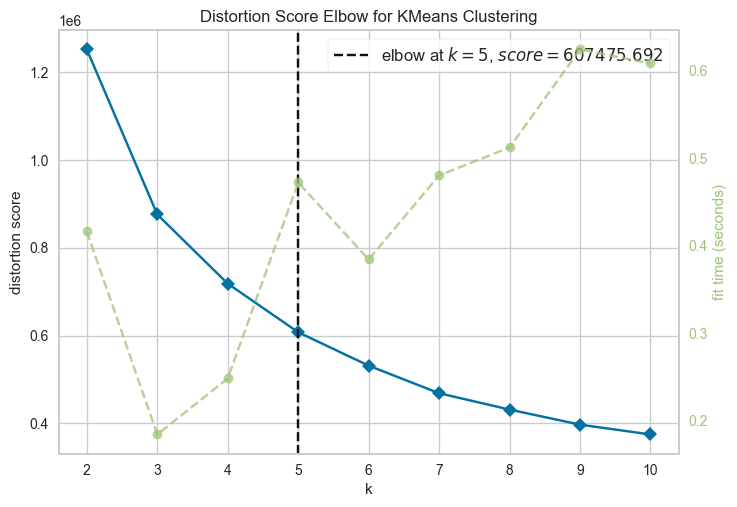

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [7]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(random_state=123), k=10)
Elbow_M.fit(ds)
Elbow_M.show()

> # 2. Với tập dữ liệu Adult.csv

In [8]:
dataf = pd.read_csv("adult.csv",encoding_errors="ignore",na_values=['?'])
dataf.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [9]:
dataf['Id'] = dataf.index

# Reset index về một cột mới "index"
dataf = dataf.reset_index()

# Gộp cột ID với DataFrame ban đầu
dataf = pd.concat([dataf['Id'], dataf.drop(['Id', 'index'], axis=1)], axis=1)

In [10]:
dataf.shape

(32561, 16)

In [11]:
dataf.isnull().sum()

Id                   0
age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [12]:
data1 = dataf.dropna(axis=0)
data1.to_csv('income.csv', index=False)

In [13]:
data1.shape

(30162, 16)

In [14]:
data1.nunique()

Id                30162
age                  72
workclass             7
fnlwgt            20263
education            16
education.num        16
marital.status        7
occupation           14
relationship          6
race                  5
sex                   2
capital.gain        118
capital.loss         90
hours.per.week       94
native.country       41
income                2
dtype: int64

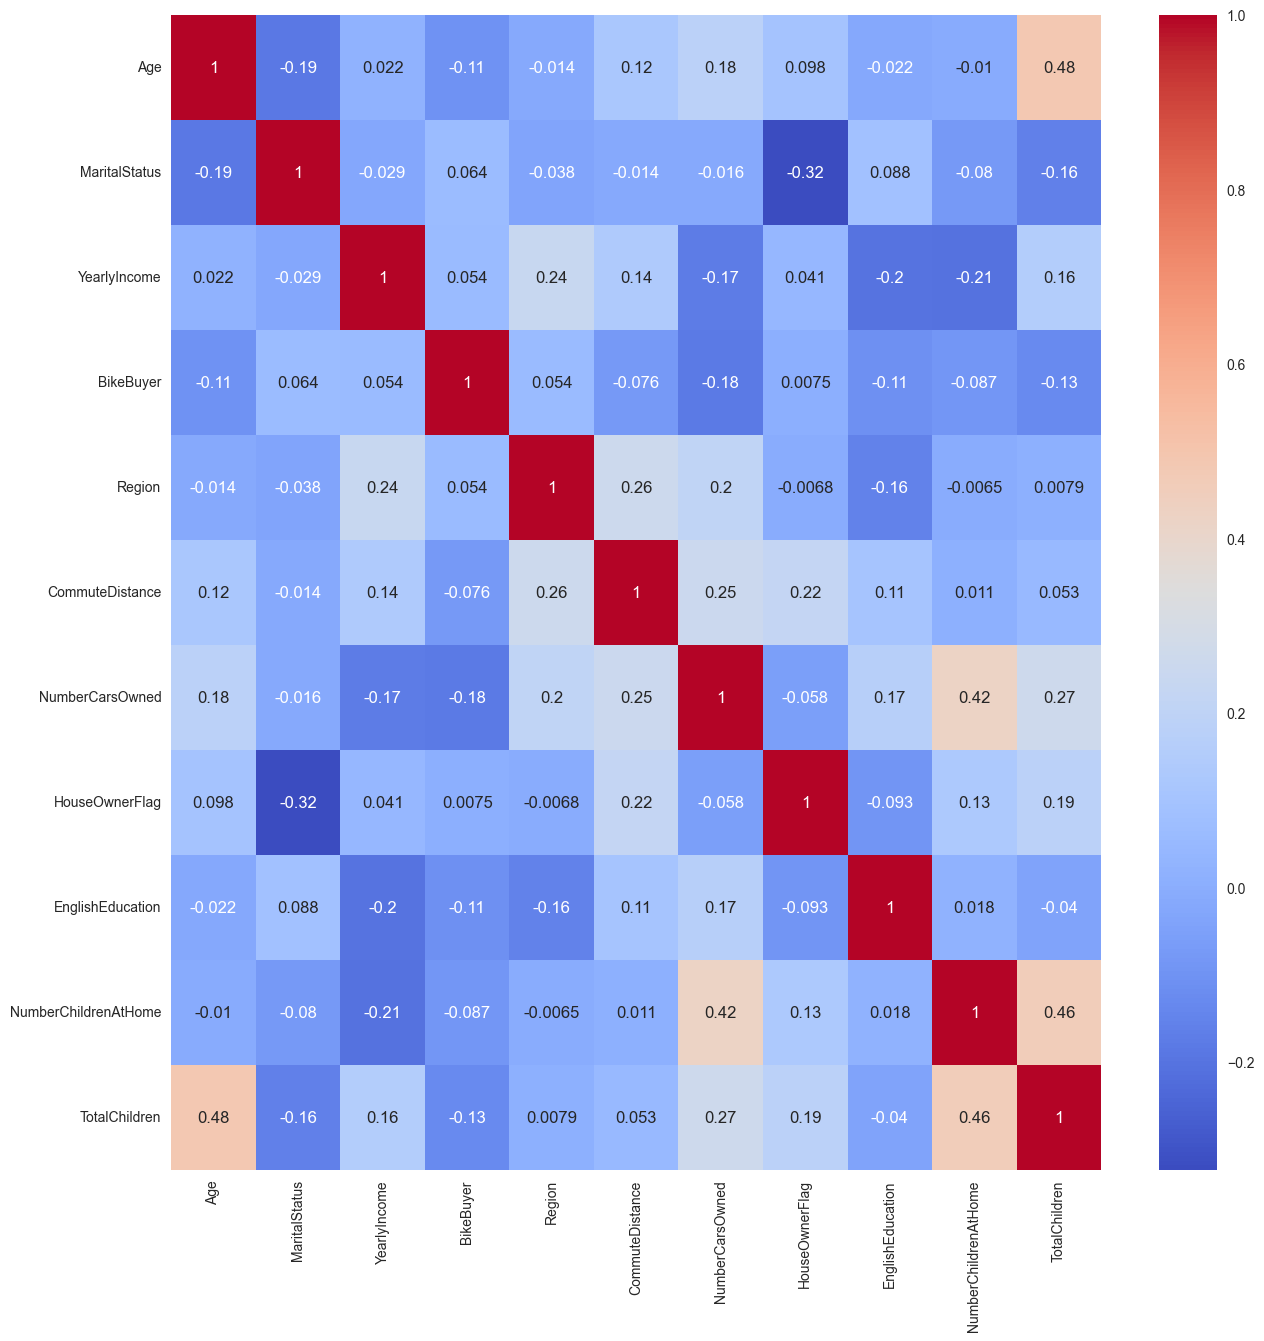

In [15]:
corr_matrix = ds.corr()

# Vẽ đồ thị heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

# Hiển thị đồ thị
plt.show()